# Introduction to the Perceptron

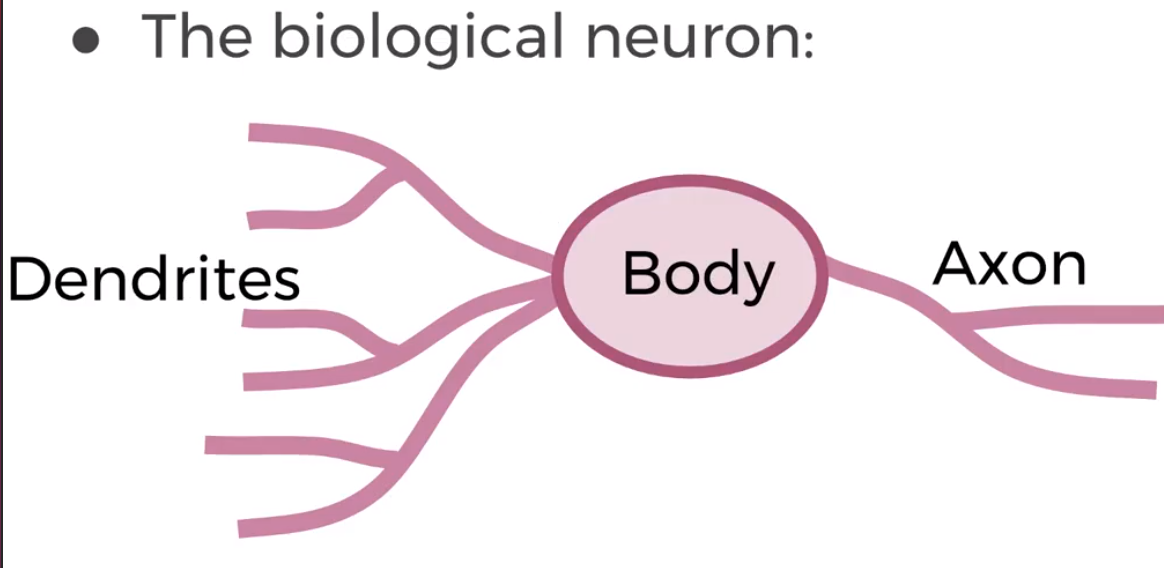

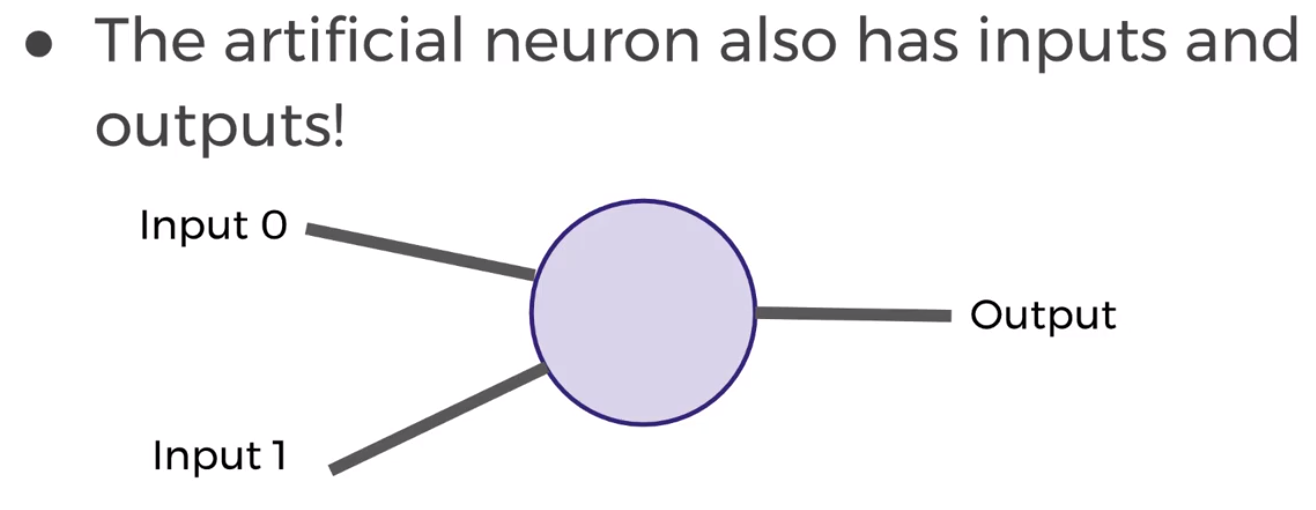

* Inputs  
* Weights 
* Activation Function  
* Bias  

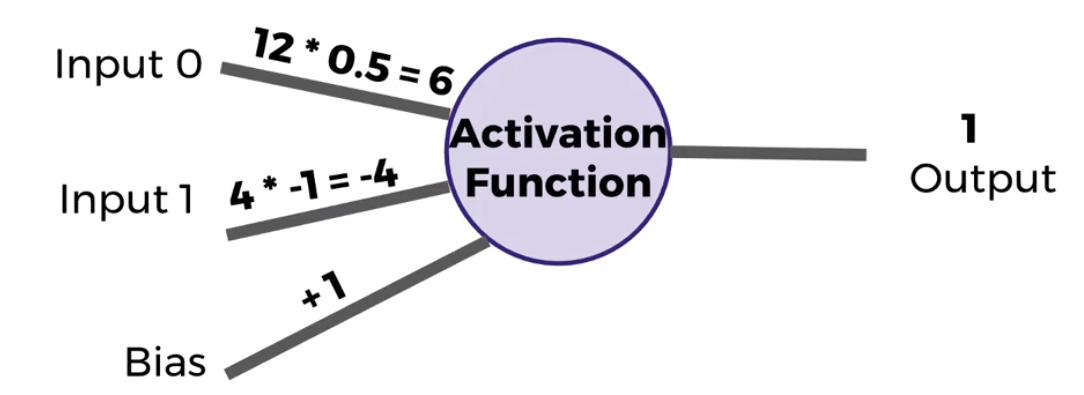

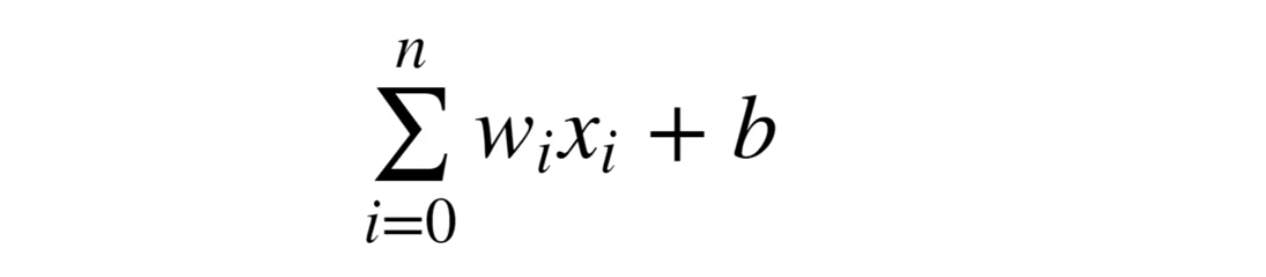

### Input Layer  
* Real values from the Data  

### Hidden Layers  
* Layers between input and output  
* 3 or more layers is considered a "deep network"  

### Output Layer  
* Final estimate of the output  

## Activation Function

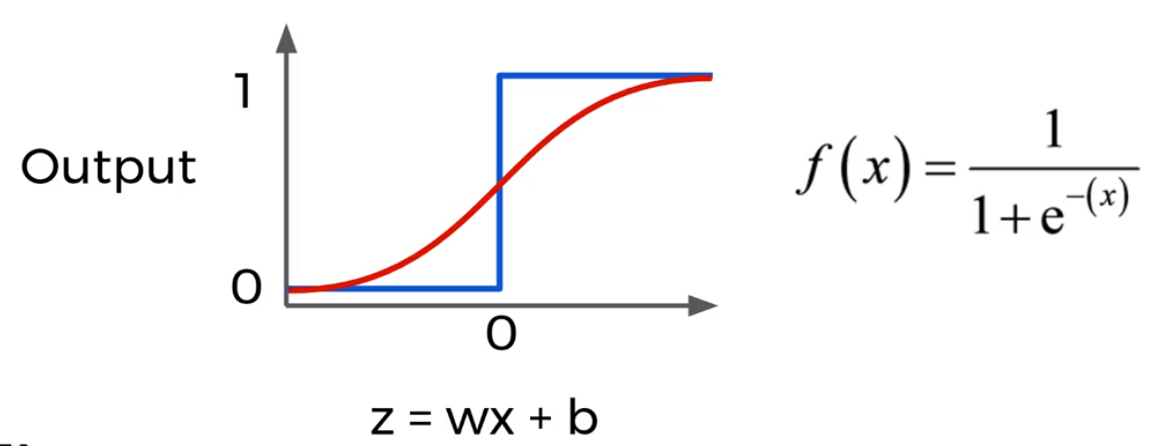

The sigmoid function

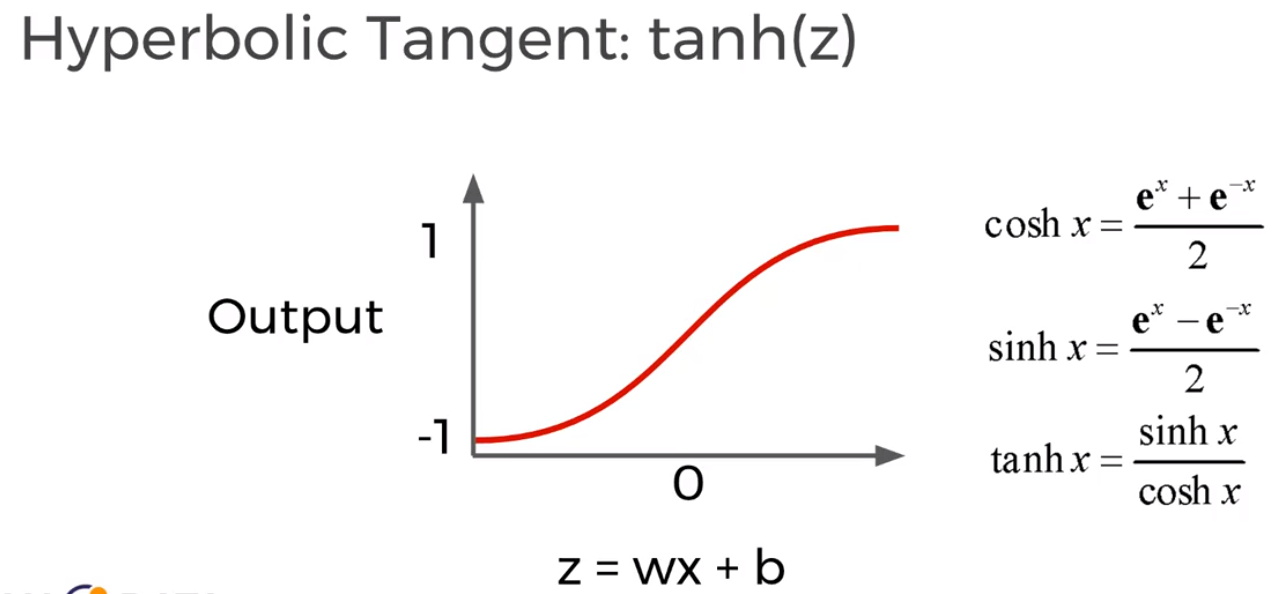

Hyperbolic Tangent Function is also a popular choice of activation function

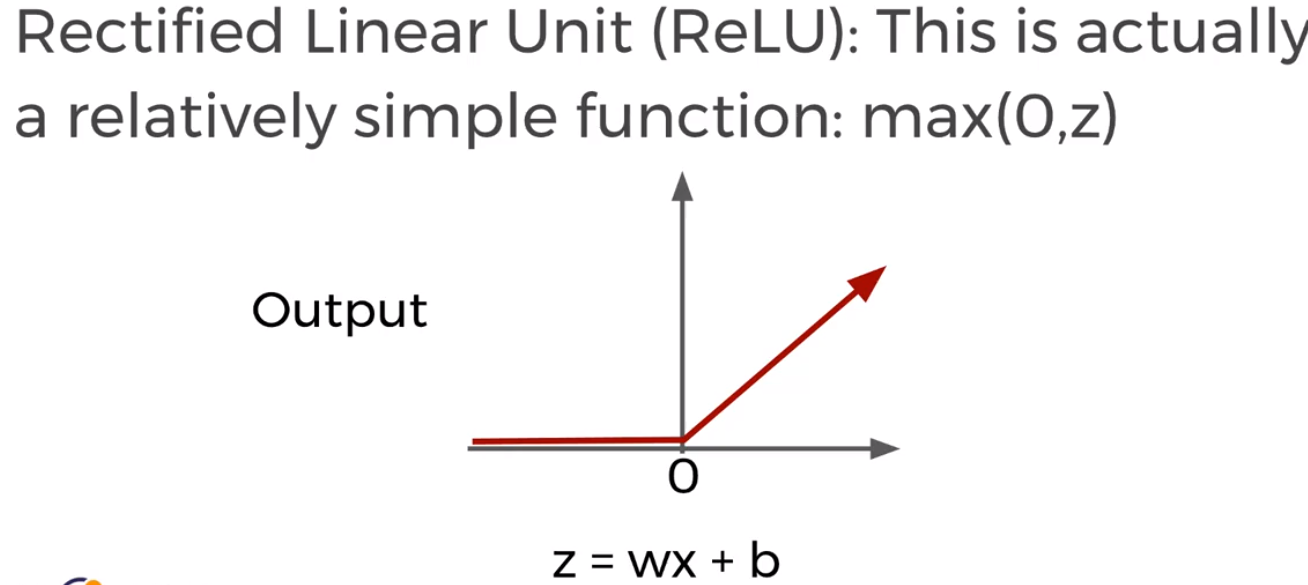

## Cost Functions

y = True Value  
a = Neuron's Prediction  

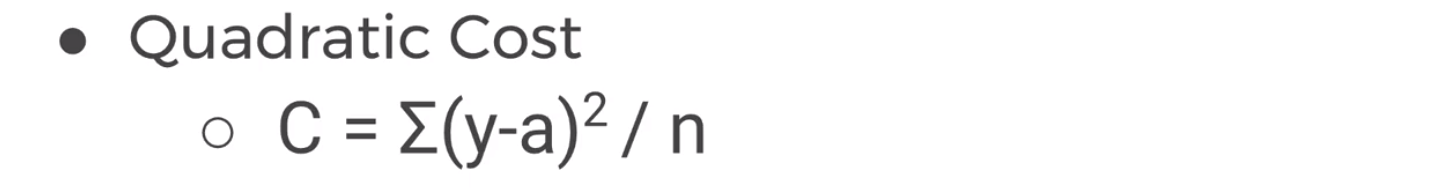

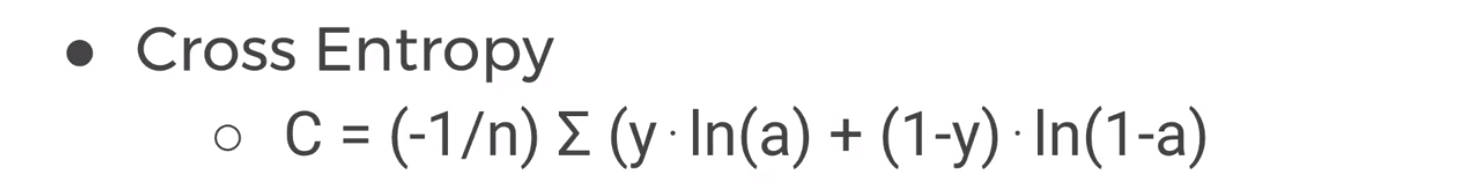

Cross Entropy is faster than the quadratic cost

## Gradient Descent - Backpropagation

Optimization algorithm for finding the minimum of a function.  
Backpropagation works back calculating the errors and then distributes back through the network layers. 

# TensorFlow - Playground

In [9]:
import webbrowser

url = 'playground.tensorflow.org'
chrome_path = 'C:/Program Files (x86)/Google/Chrome/Application/chrome.exe %s'

webbrowser.get(chrome_path).open(url)

True

# Manual Neural Network

In [53]:
class SimpleClass():
    
    def __init__(self, name = ''):
        print('hello ' + name)
        
    def yell(self):
        print('YELLING')

In [54]:
x = SimpleClass()

hello 


In [55]:
x.yell()

YELLING


In [56]:
class ExtendedClass(SimpleClass):
    
    def __init__(self):
        
        super().__init__("cunt")
        print("EXTEND!")

In [57]:
y = ExtendedClass()

hello cunt
EXTEND!


In [26]:
y.yell()

YELLING


Building Neural Network

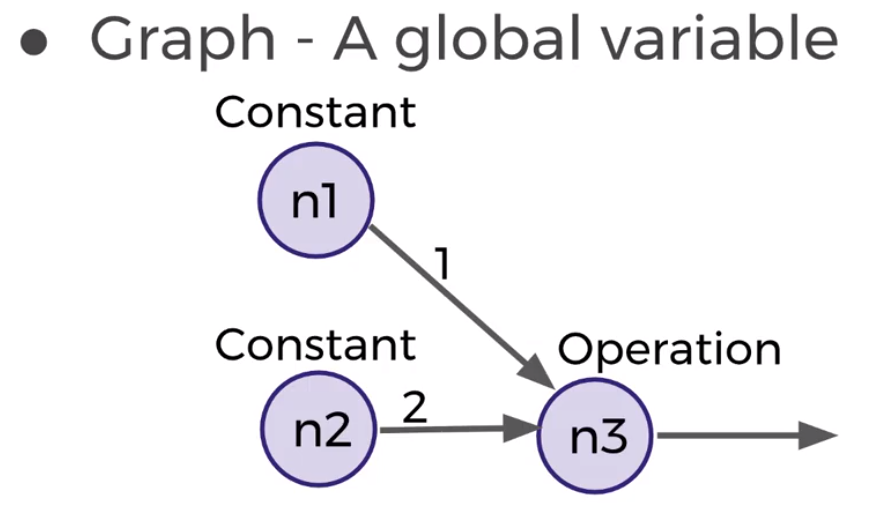

Other classes can inherit the operation class

## Operation

In [186]:
class Operation():
    """
    An Operation is a node in a "Graph". TensorFlow will also use this concept of a Graph.
    
    This Operation class will be inherited by other classes that actually compute the specific
    operation, such as adding or matrix multiplication.
    """
    
    def __init__(self, input_nodes = []):
        """
        Intialize an Operation
        """
        self.input_nodes = input_nodes # The list of input nodes
        self.output_nodes = [] # List of nodes consuming this node's output
        
        # For every node in the input, we append this operation (self) to the list of
        # the consumers of the input nodes
        for node in input_nodes:
            node.output_nodes.append(self)
        
        # There will be a global default graph (TensorFlow works this way)
        # We will then append this particular operation
        # Append this operation to the list of operations in the currently active default graph
        _default_graph.operations.append(self)
  
    def compute(self):
        """ 
        This is a placeholder function. It will be overwritten by the actual specific operation
        that inherits from this class.
        
        """
        
        pass

In [187]:
class add(Operation):
    
    def __init__(self, x, y):
         
        super().__init__([x, y])

    def compute(self, x_var, y_var):
         
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [188]:
class multiply(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_var, b_var):
         
        self.inputs = [a_var, b_var]
        return a_var * b_var

In [267]:
class matmul(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_mat, b_mat):
         
        self.inputs = [a_mat, b_mat]
        return a_mat.dot(b_mat)

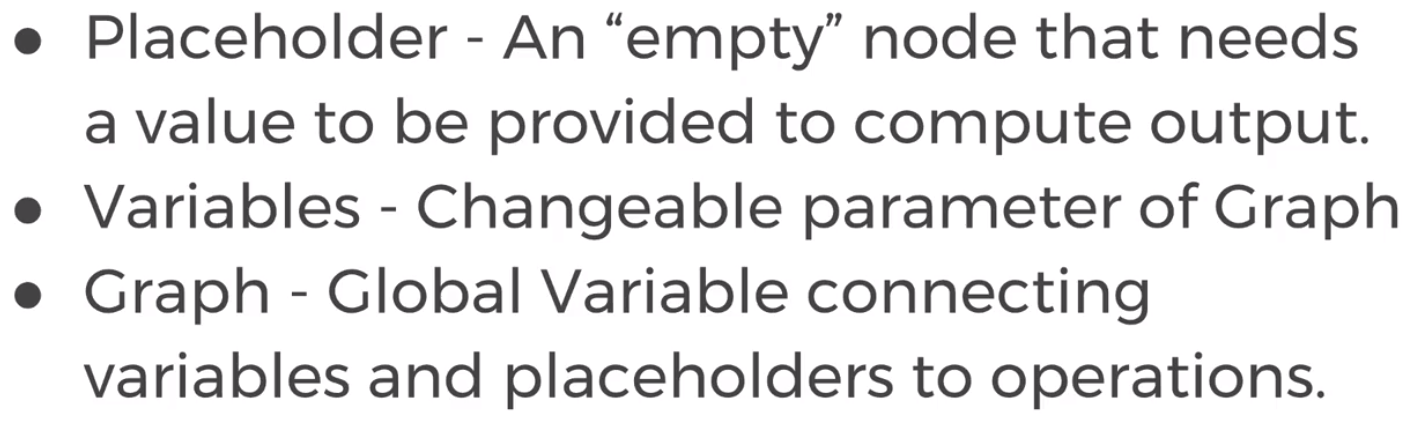

In [268]:
class Placeholder():
    """
    A placeholder is a node that needs to be provided a value for computing the output in the Graph.
    """
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [269]:
class Variable():
    """
    This variable is a changeable parameter of the Graph.
    """
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
         
        _default_graph.variables.append(self)

In [270]:
class Graph():
    
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        """
        Sets this Graph instance as the Global Default Graph
        """
        global _default_graph
        _default_graph = self

$$ z = Ax + b $$

with A = 10 and b = 1

$$ z = 10x + 1 $$

In [271]:
g = Graph()

In [272]:
g.set_as_default()

In [273]:
A = Variable(10)

In [274]:
b = Variable(1)

In [275]:
x = Placeholder()

In [276]:
y = multiply(A,x)

In [277]:
z = add(y,b)

In [278]:
import numpy as np

### PostOrder Tree Traversal

In [279]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    print(nodes_postorder)
    return nodes_postorder

In [280]:
class Session:
    
    def run(self, operation, feed_dict = {}):
        """ 
          operation: The operation to compute
          feed_dict: Dictionary mapping placeholders to input values (the data)  
        """
        
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            print(node)

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]
                print(node.inputs)
                 
                node.output = node.compute(*node.inputs)
                print(node.output)
                
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output

In [281]:
sess = Session()

In [282]:
result = sess.run(operation = z, feed_dict={x:10})

[<__main__.Variable object at 0x000001DFE87F74A8>, <__main__.Placeholder object at 0x000001DFE8AEE828>, <__main__.multiply object at 0x000001DFE5A64400>, <__main__.Variable object at 0x000001DFE87F75F8>, <__main__.add object at 0x000001DFE5A79A90>]
[10, 10]
100
[100, 1]
101


In [283]:
result

101

In [284]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2])

x = Placeholder()

y = matmul(A,x)

z = add(y,b)

In [285]:
sess = Session()

In [286]:
sess.run(operation=z, feed_dict={x:10})

[<__main__.Variable object at 0x000001DFE8AA8DD8>, <__main__.Placeholder object at 0x000001DFE8AA8FD0>, <__main__.matmul object at 0x000001DFE8ADF278>, <__main__.Variable object at 0x000001DFE8A5D198>, <__main__.add object at 0x000001DFE8ADFC18>]
[array([[10, 20],
       [30, 40]]), 10]
[[100 200]
 [300 400]]
[array([[100, 200],
       [300, 400]]), array([1, 2])]
[[101 202]
 [301 402]]


array([[101, 202],
       [301, 402]])

# Classification

## Activation Function

In [287]:
import matplotlib.pyplot as plt
%matplotlib inline

In [288]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [289]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

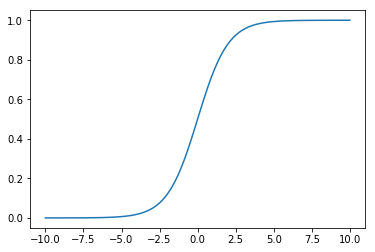

In [290]:
plt.plot(sample_z,sample_a)

All values are between 0 and 1

In [291]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super().__init__([z])
        
    def compute(self, z):
        return 1 / (1 + np.exp(-z))

In [292]:
from sklearn.datasets import make_blobs

In [293]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [294]:
features = data[0]
labels = data[1]

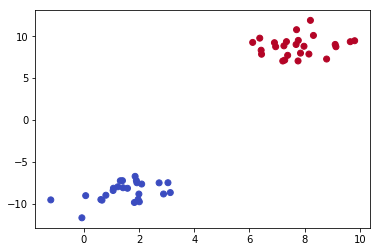

In [295]:
plt.scatter(features[:,0], features[:,1], c = labels, cmap = 'coolwarm')

In [296]:
x = np.linspace(0,11,10)
y = -x + 5

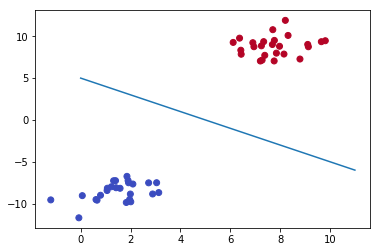

In [297]:
plt.scatter(features[:,0], features[:,1], c = labels, cmap = 'coolwarm')
plt.plot(x,y)

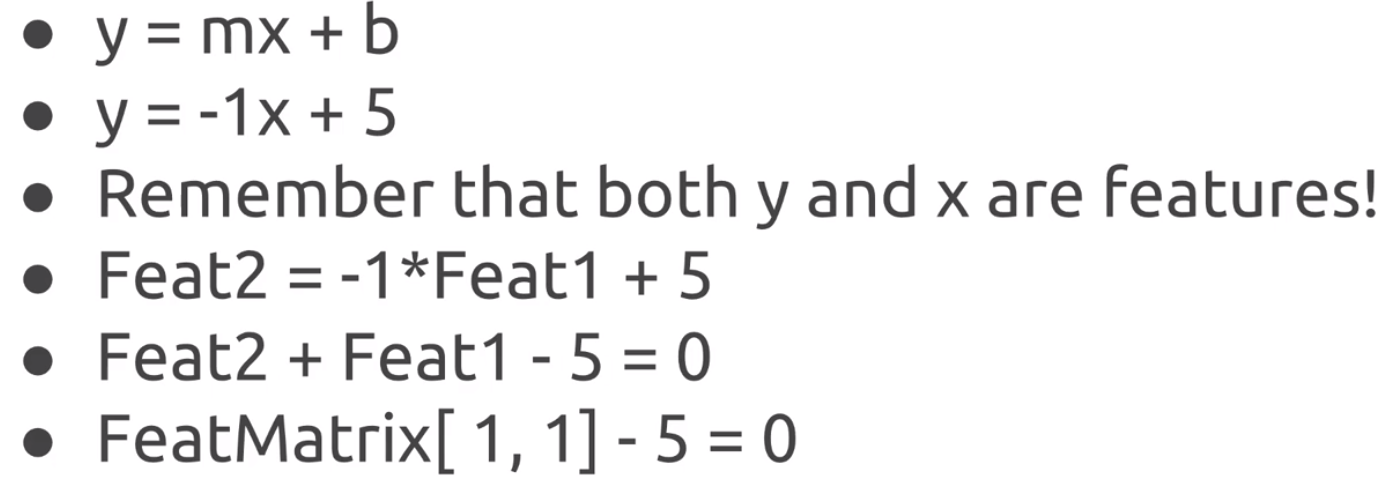

Converting linear equation into a matrix form

$$ (1,1) * f - 5 = 0 $$

In [298]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

This will be a red because the output is greater than 0

In [299]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

Below the line -> blue

In [300]:
g = Graph()

In [301]:
g.set_as_default()

In [302]:
x = Placeholder() #placeholder for features

In [303]:
w = Variable([1,1])

In [304]:
b = Variable(-5)

In [305]:
z = add(matmul(w,x),b)

In [306]:
a = Sigmoid(z)

In [307]:
sess = Session()

In [308]:
sess.run(operation=a, feed_dict={x:[8,10]})

[<__main__.Variable object at 0x000001DFE8C6C668>, <__main__.Placeholder object at 0x000001DFE8C6CF60>, <__main__.matmul object at 0x000001DFE8C6C4E0>, <__main__.Variable object at 0x000001DFE8C6C6A0>, <__main__.add object at 0x000001DFE8C6C0F0>, <__main__.Sigmoid object at 0x000001DFE8C6C438>]
[array([1, 1]), array([ 8, 10])]
18
[18, -5]
13
[13]
0.999997739676


0.99999773967570205

In [311]:
sess.run(operation=a, feed_dict={x:[-2,-10]})

[<__main__.Variable object at 0x000001DFE8C6C668>, <__main__.Placeholder object at 0x000001DFE8C6CF60>, <__main__.matmul object at 0x000001DFE8C6C4E0>, <__main__.Variable object at 0x000001DFE8C6C6A0>, <__main__.add object at 0x000001DFE8C6C0F0>, <__main__.Sigmoid object at 0x000001DFE8C6C438>]
[array([1, 1]), array([ -2, -10])]
-12
[-12, -5]
-17
[-17]
4.13993754739e-08


4.1399375473943306e-08